In [29]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 3.3 MB/s eta 0:00:0000:0100:01


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_csv("/Users/saumit/ApnaGuide/Project1/Churn-Data.csv")
dataset

,cID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,TV_Streaming,Movie_Streaming,Contract,PaperlessBilling,Method_Payment,Charges_Month,TotalCharges,Churn
0,4223-BKEOR,Female,0,No,Yes,21,Yes,No,DSL,Yes,...,Yes,No,No,Yes,One year,No,Mailed check,64.85,1336.8,No
1,6035-RIIOM,Female,0,No,No,54,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),97.20,5129.45,No
2,3797-VTIDR,Male,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,23.45,23.45,Yes
3,2568-BRGYX,Male,0,No,No,4,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.20,237.95,Yes
4,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0684-AOSIH,Male,0,Yes,No,1,Yes,No,Fiber optic,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.00,95,Yes
5630,5982-PSMKW,Female,0,Yes,Yes,23,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),91.10,2198.3,No
5631,8044-BGWPI,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,21.15,306.05,No
5632,7450-NWRTR,Male,1,No,No,12,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.45,1200.15,Yes


In [5]:
dataset.describe()

,SeniorCitizen,tenure,Charges_Month
count,5634.000000,5634.000000,5634.000000
mean,0.160809,32.373092,64.864253
std,0.367388,24.424539,30.089324
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.750000
50%,0.000000,29.000000,70.525000
75%,0.000000,55.000000,89.937500
max,1.000000,72.000000,118.600000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cID               5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  TV_Streaming      5634 non-null   object 
 14  Movie_Streaming   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   object 


In [18]:
# Check for missing values
missing_values = dataset.isnull().sum()
print("Missing values in each column:\n", missing_values)


# Replace spaces with NaN in 'TotalCharges' column and convert it to numeric
dataset['TotalCharges'] = dataset['TotalCharges'].replace(" ", pd.NA)
dataset['TotalCharges'] = pd.to_numeric(dataset['TotalCharges'])

Missing values in each column:
 gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
TV_Streaming         0
Movie_Streaming      0
Contract             0
PaperlessBilling     0
Method_Payment       0
Charges_Month        0
TotalCharges        10
Churn                0
dtype: int64


In [19]:

# # Drop the 'cID' column as it is not needed for prediction
# dataset.drop(['cID'], axis=1, inplace=True)



# Identify categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 
                        'MultipleLines', 'InternetService', 'OnlineSecurity', 
                        'OnlineBackup', 'DeviceProtection', 'TechSupport', 
                        'TV_Streaming', 'Movie_Streaming', 'Contract', 
                        'PaperlessBilling', 'Method_Payment', 'Churn']

# One-hot encode categorical features
data = pd.get_dummies(dataset, columns=categorical_features, drop_first=True)

# Display the first few rows of the dataset after encoding
print(data)


      SeniorCitizen  tenure  Charges_Month  TotalCharges  gender_Male  \
0                 0      21          64.85       1336.80        False   
1                 0      54          97.20       5129.45        False   
2                 0       1          23.45         23.45         True   
3                 0       4          70.20        237.95         True   
4                 0       0          61.90           NaN         True   
...             ...     ...            ...           ...          ...   
5629              0       1          95.00         95.00         True   
5630              0      23          91.10       2198.30        False   
5631              0      12          21.15        306.05         True   
5632              1      12          99.45       1200.15         True   
5633              0      26          19.80        457.30         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0           False            True              True   
1           F

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5634 entries, 0 to 5633
Data columns (total 31 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   SeniorCitizen                           5634 non-null   int64  
 1   tenure                                  5634 non-null   int64  
 2   Charges_Month                           5634 non-null   float64
 3   TotalCharges                            5624 non-null   float64
 4   gender_Male                             5634 non-null   bool   
 5   Partner_Yes                             5634 non-null   bool   
 6   Dependents_Yes                          5634 non-null   bool   
 7   PhoneService_Yes                        5634 non-null   bool   
 8   MultipleLines_No phone service          5634 non-null   bool   
 9   MultipleLines_Yes                       5634 non-null   bool   
 10  InternetService_Fiber optic             5634 non-null   bool

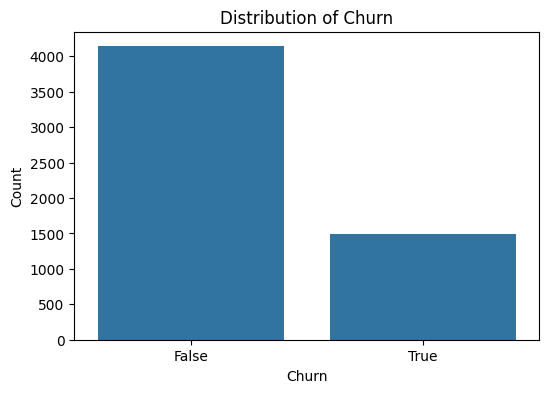

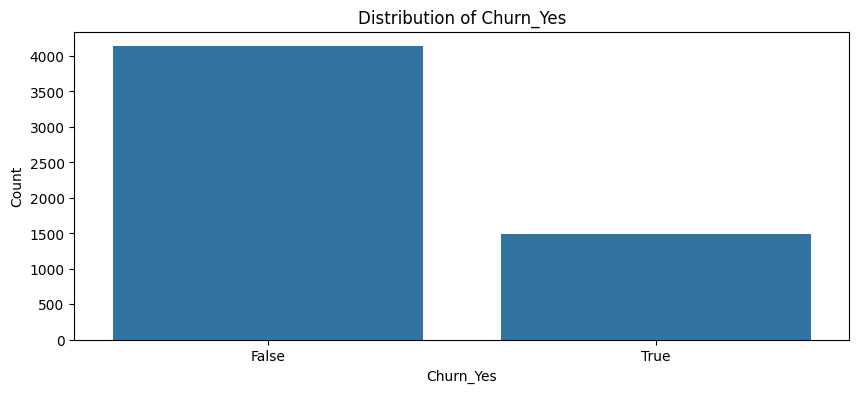

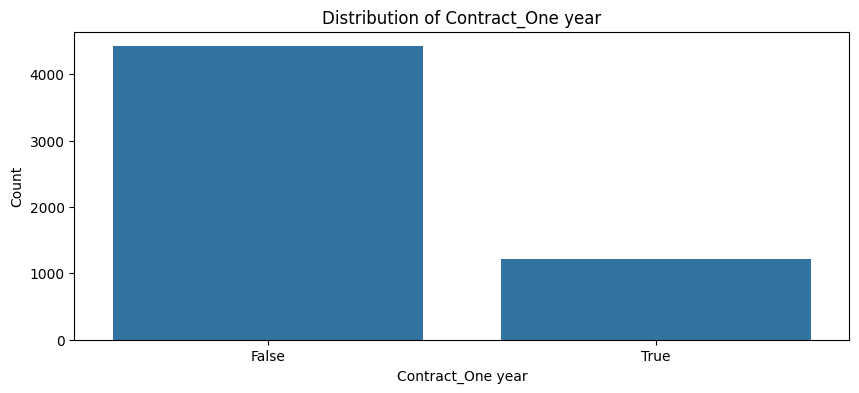

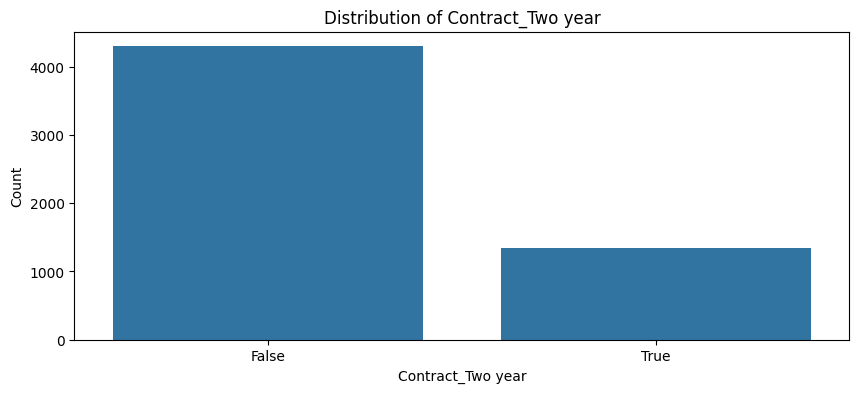

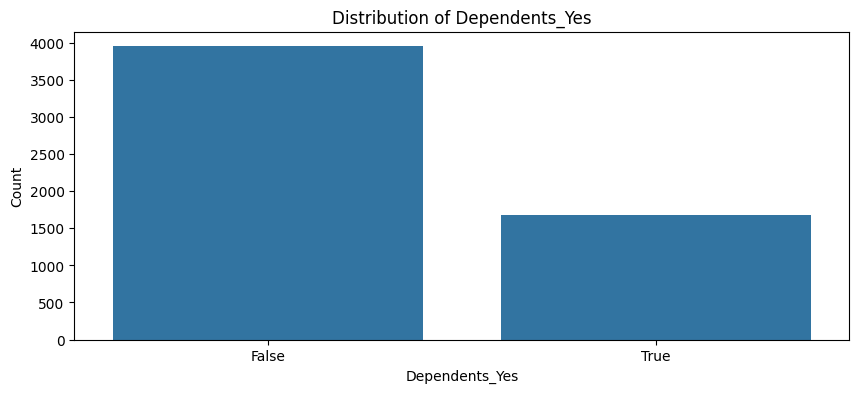

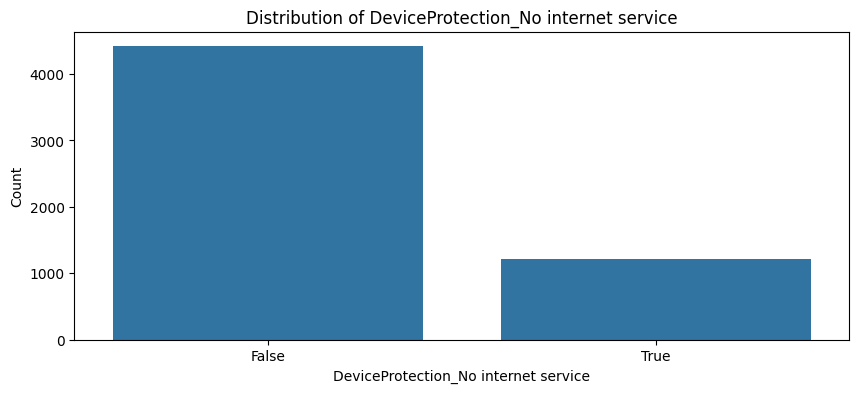

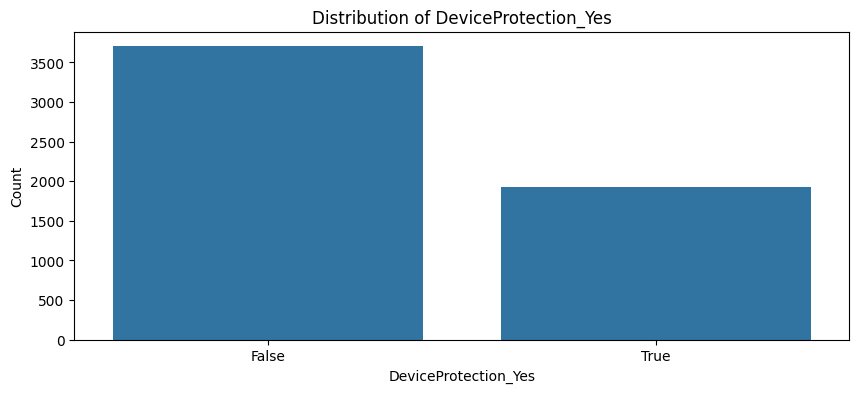

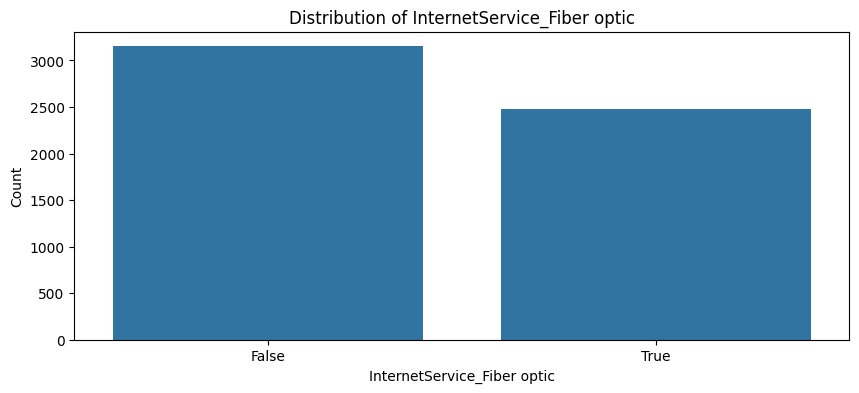

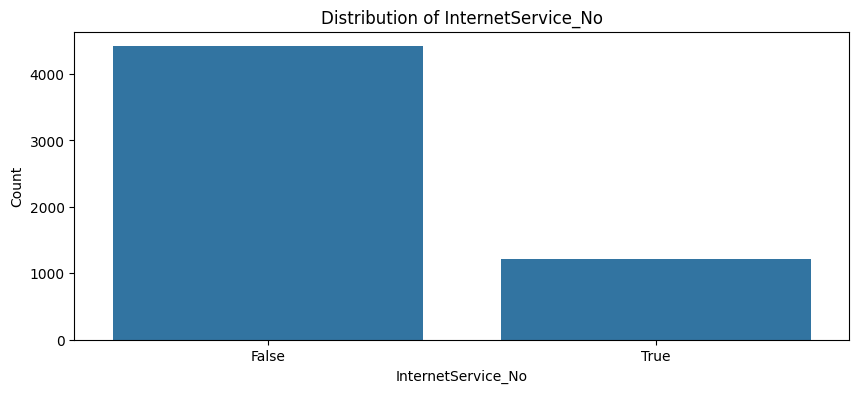

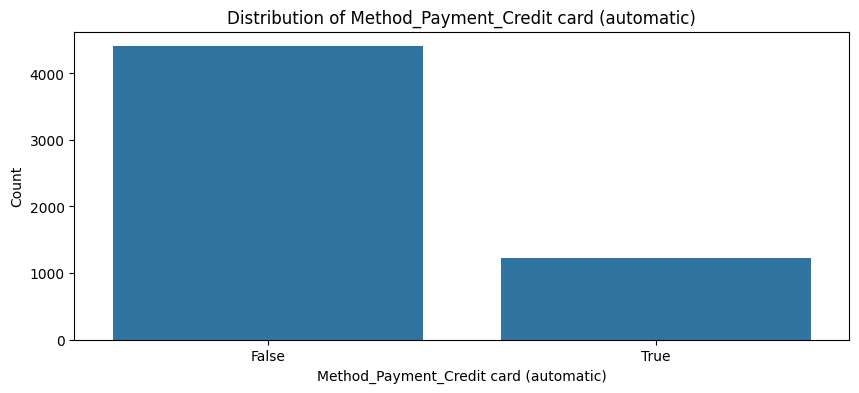

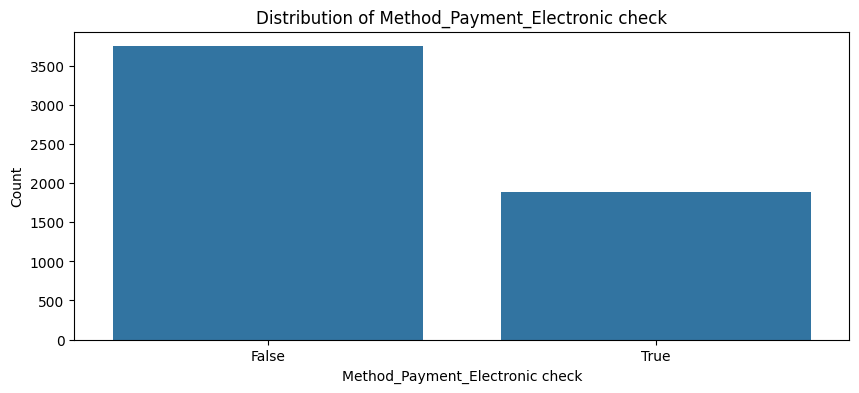

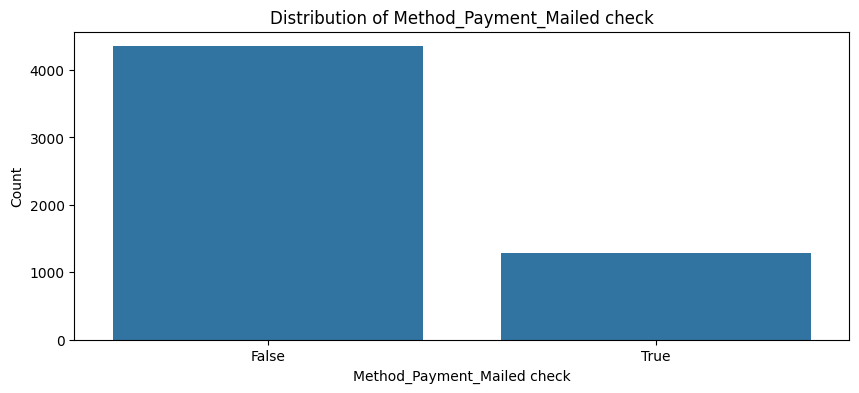

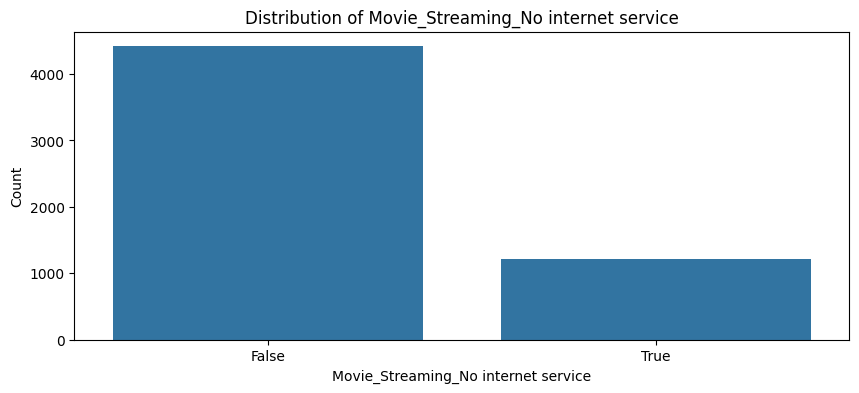

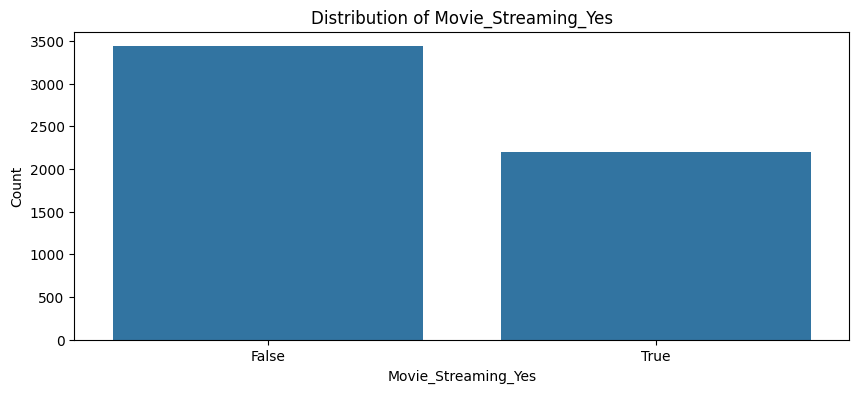

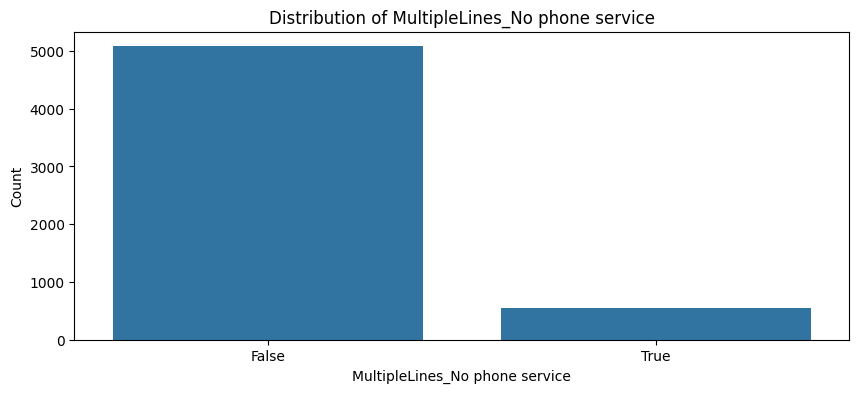

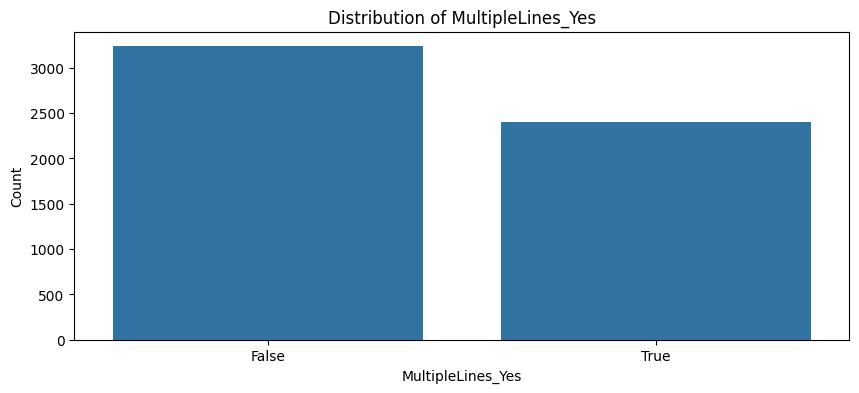

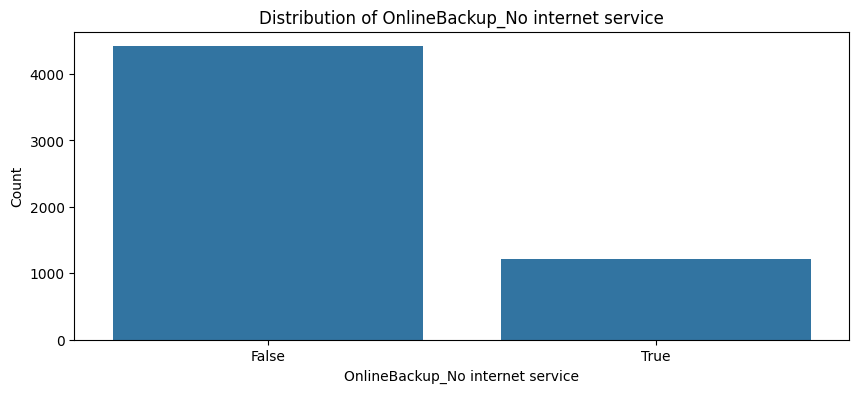

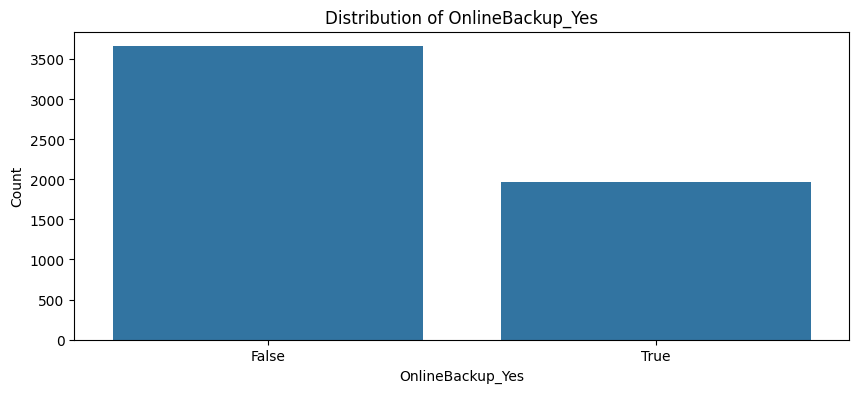

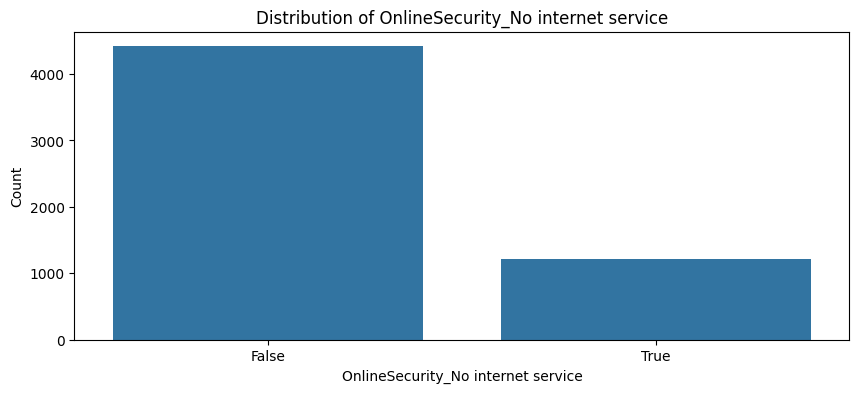

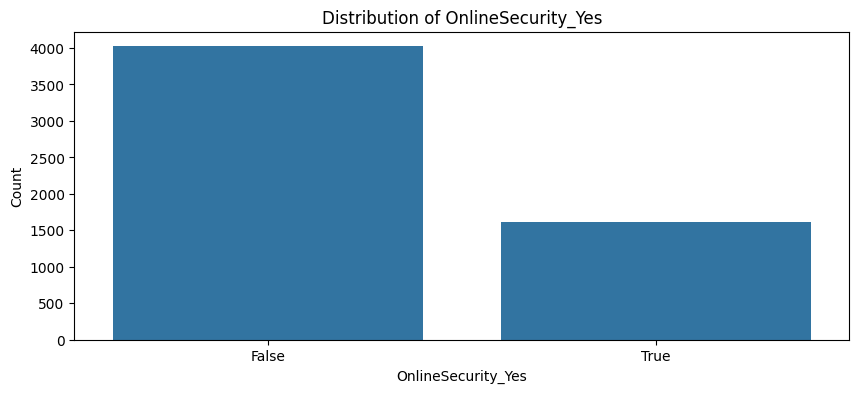

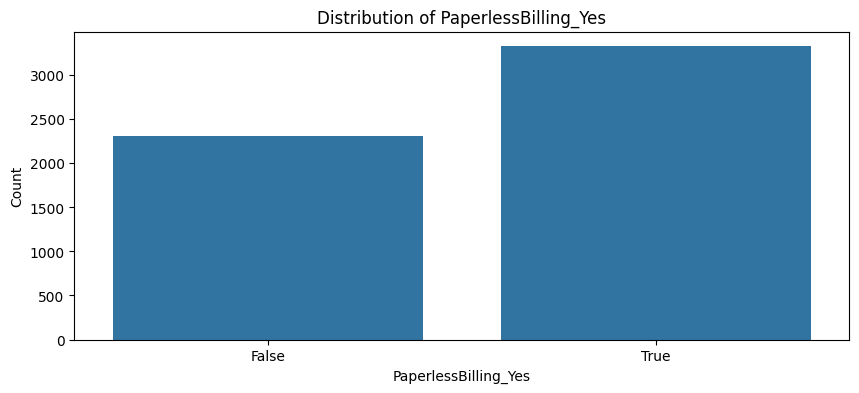

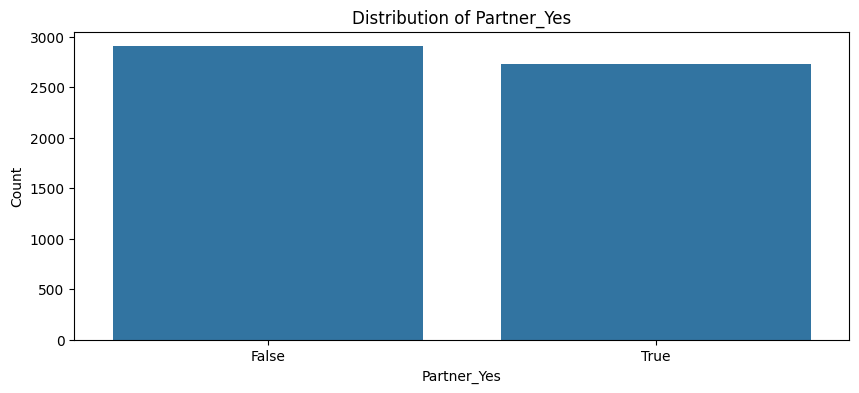

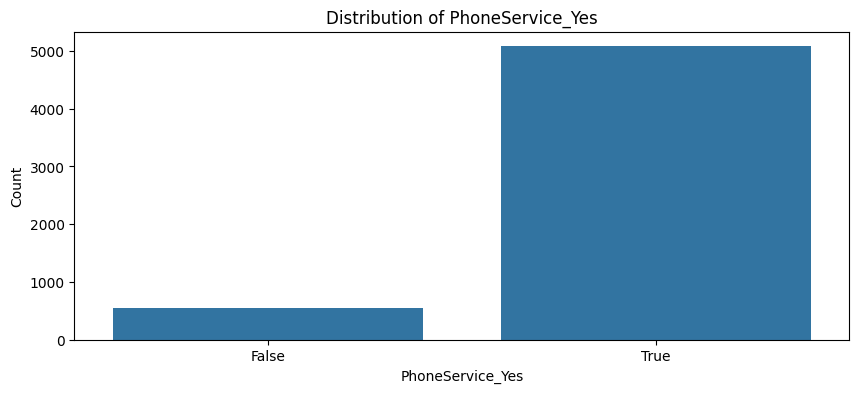

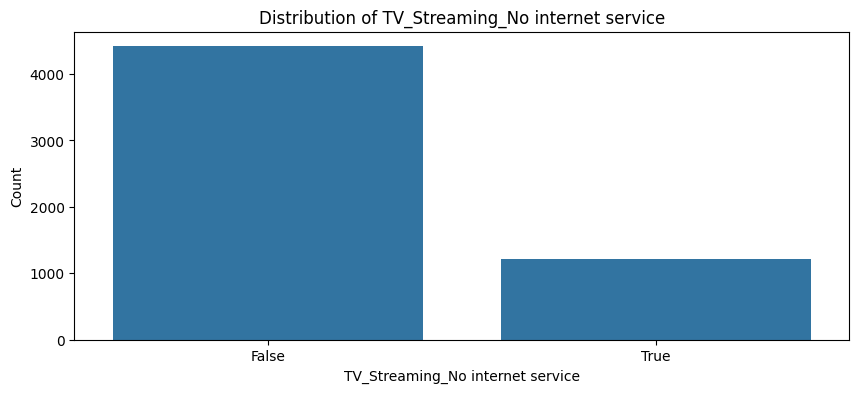

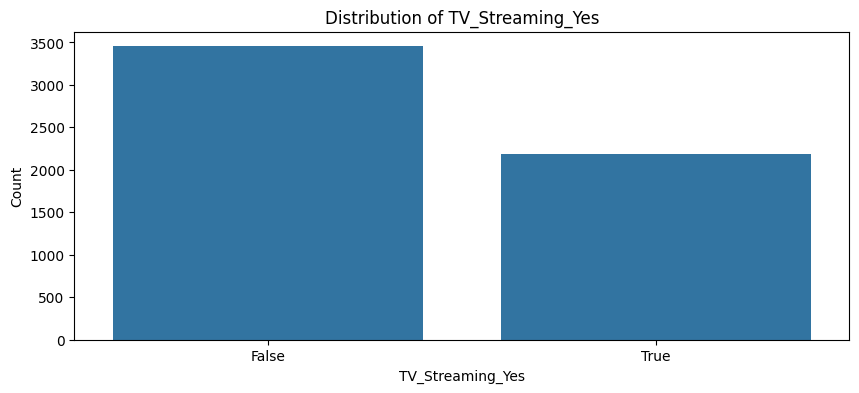

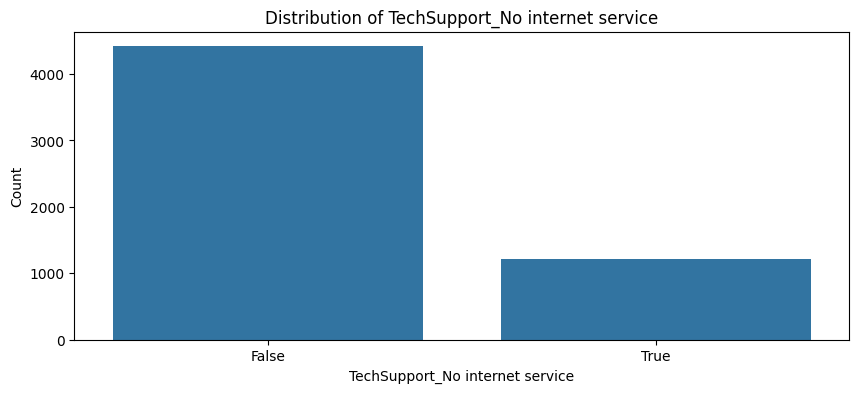

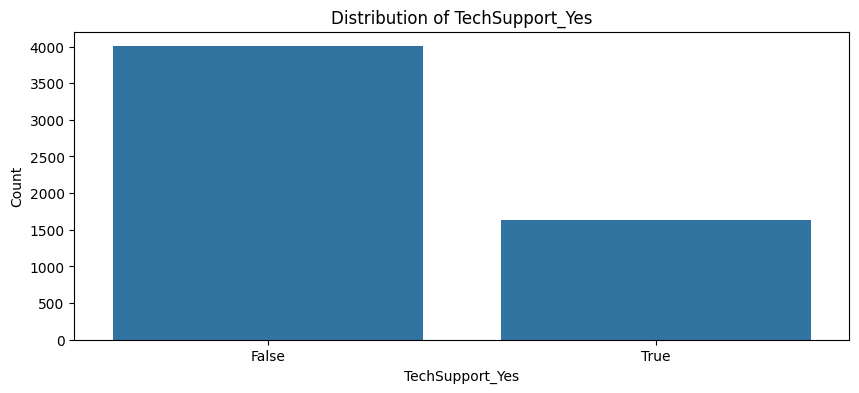

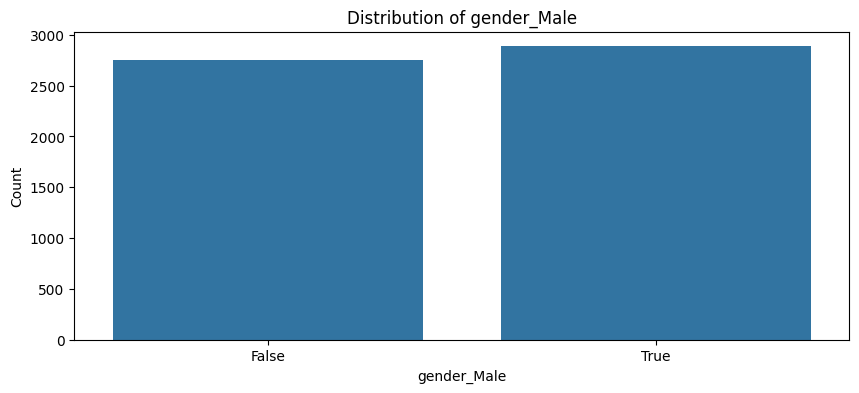

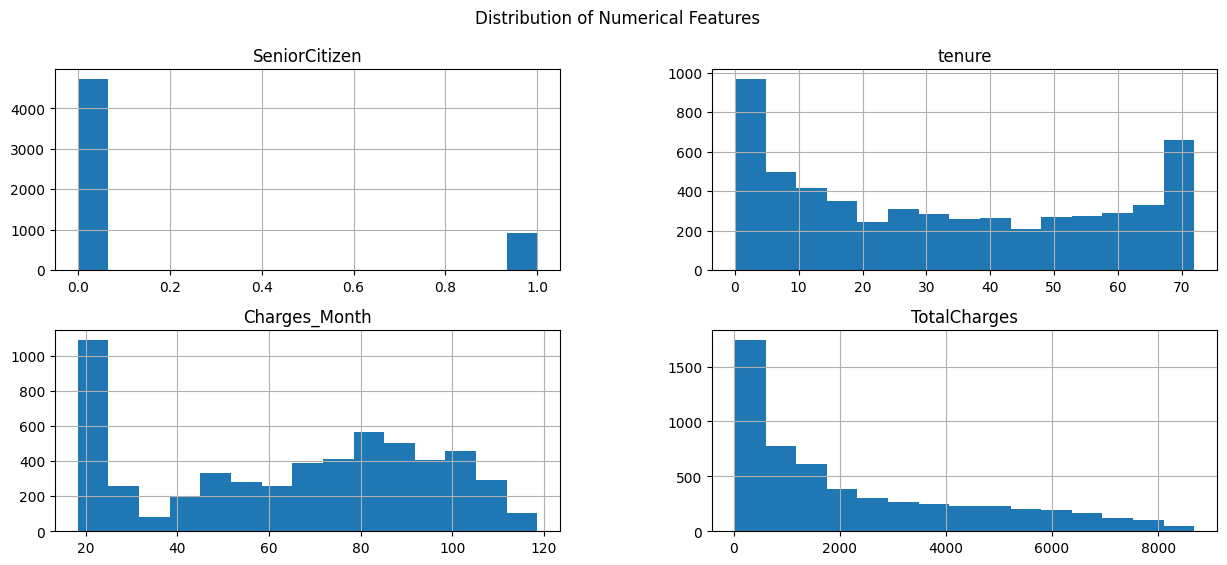

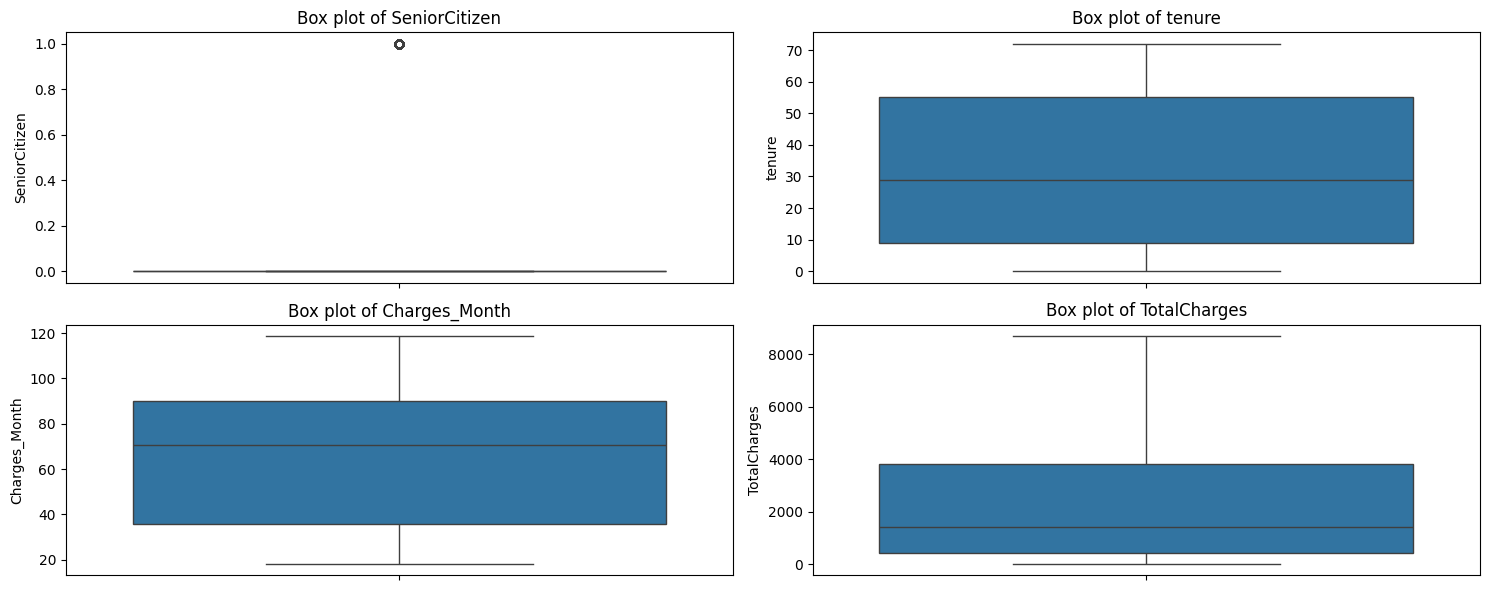

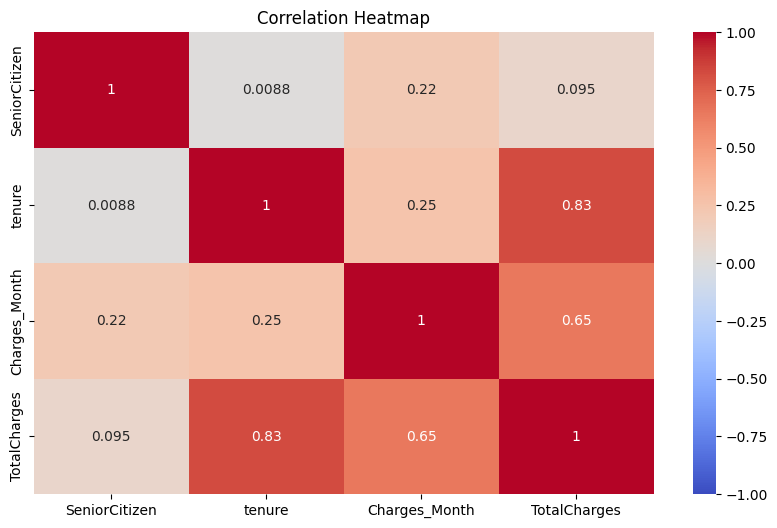

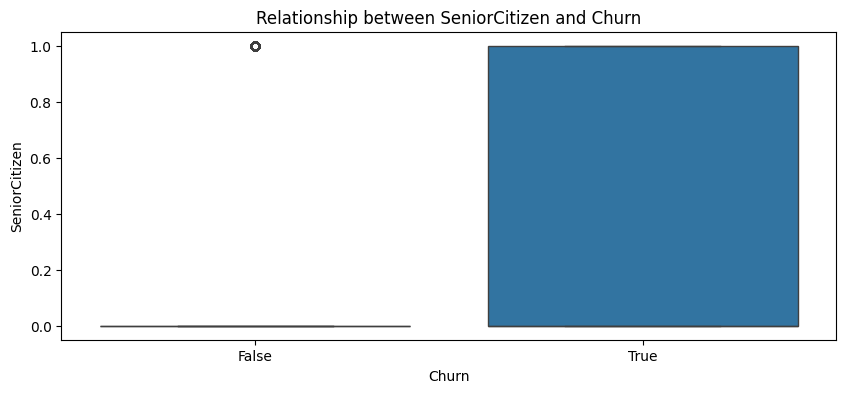

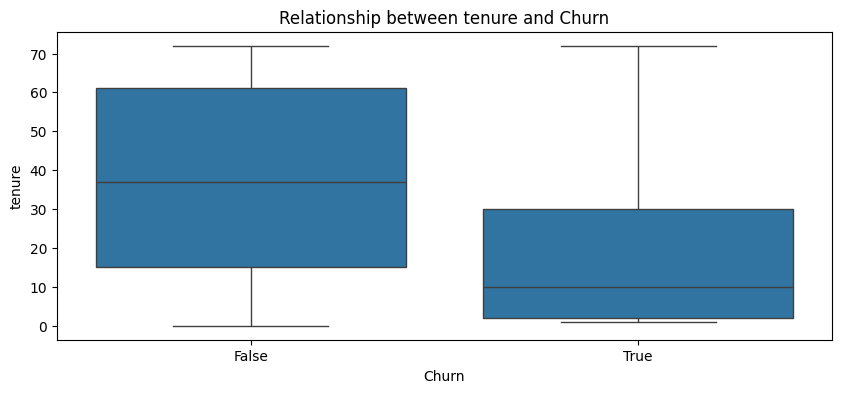

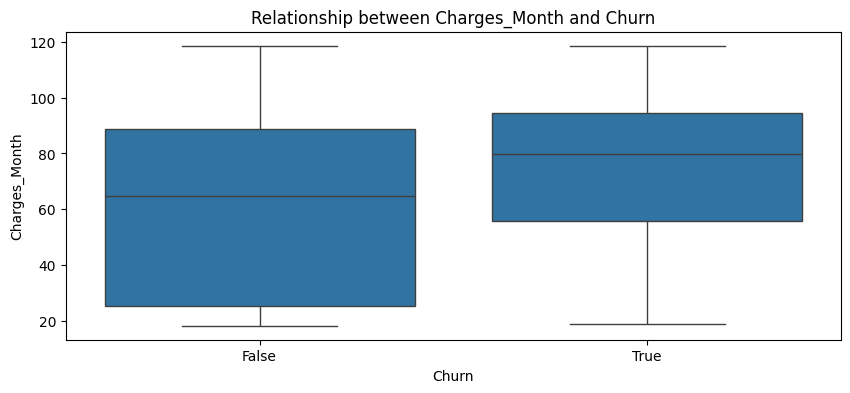

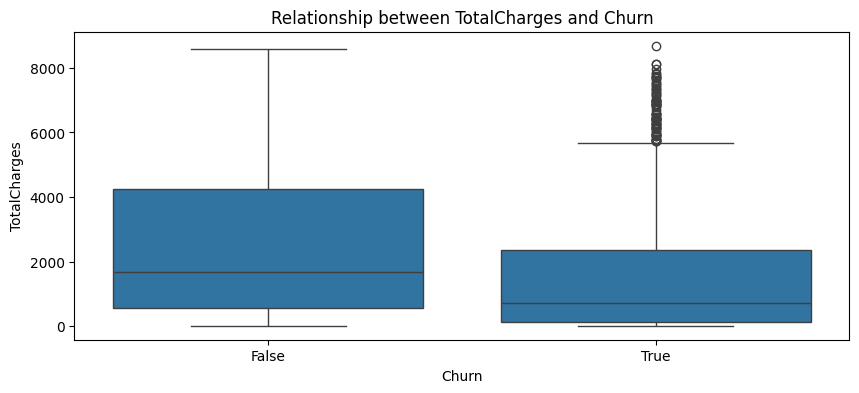

In [21]:
# Visualize the distribution of the target variable (Churn)
plt.figure(figsize=(6, 4))
sns.countplot(x='Churn_Yes', data=data)
plt.title('Distribution of Churn')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of one-hot encoded categorical features
one_hot_encoded_columns = data.columns.difference(['SeniorCitizen', 'tenure', 'Charges_Month', 'TotalCharges'])

for col in one_hot_encoded_columns:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

# Visualize numerical features
numerical_features = ['SeniorCitizen', 'tenure', 'Charges_Month', 'TotalCharges']
data[numerical_features].hist(bins=15, figsize=(15, 6), layout=(2, 2))
plt.suptitle('Distribution of Numerical Features')
plt.show()

# Box plots for numerical features to check for outliers
plt.figure(figsize=(15, 6))
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=col, data=data)
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(10, 6))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Visualize relationships between numerical features and target variable (Churn)
for col in numerical_features:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x='Churn_Yes', y=col, data=data)
    plt.title(f'Relationship between {col} and Churn')
    plt.xlabel('Churn')
    plt.ylabel(col)
    plt.show()

In [24]:

# Check for any remaining missing values
print(data.isnull().sum())


SeniorCitizen                              0
tenure                                     0
Charges_Month                              0
TotalCharges                              10
gender_Male                                0
Partner_Yes                                0
Dependents_Yes                             0
PhoneService_Yes                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBackup_No internet service           0
OnlineBackup_Yes                           0
DeviceProtection_No internet service       0
DeviceProtection_Yes                       0
TechSupport_No internet service            0
TechSupport_Yes                            0
TV_Streaming_No internet service           0
TV_Streaming_Yes                           0
Movie_Stre

In [25]:
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

# Ensure no more missing values
print("Missing values after imputation:\n", data.isnull().sum())

Missing values after imputation:
 SeniorCitizen                             0
tenure                                    0
Charges_Month                             0
TotalCharges                              0
gender_Male                               0
Partner_Yes                               0
Dependents_Yes                            0
PhoneService_Yes                          0
MultipleLines_No phone service            0
MultipleLines_Yes                         0
InternetService_Fiber optic               0
InternetService_No                        0
OnlineSecurity_No internet service        0
OnlineSecurity_Yes                        0
OnlineBackup_No internet service          0
OnlineBackup_Yes                          0
DeviceProtection_No internet service      0
DeviceProtection_Yes                      0
TechSupport_No internet service           0
TechSupport_Yes                           0
TV_Streaming_No internet service          0
TV_Streaming_Yes                          

/var/folders/jw/xdjgvbw534x94g51k1ltxy640000gn/T/ipykernel_21970/2870459646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


In [26]:
data['tenure_group'] = pd.cut(data['tenure'], bins=[0, 12, 24, 36, 48, 60, 72], labels=['0-12', '12-24', '24-36', '36-48', '48-60', '60-72'])
data = pd.get_dummies(data, columns=['tenure_group'], drop_first=True)

# Scale numerical features
numerical_features = ['SeniorCitizen', 'tenure', 'Charges_Month', 'TotalCharges']
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the dataset after feature engineering and scaling
print(data.head())

   SeniorCitizen    tenure  Charges_Month  TotalCharges  gender_Male  \
0      -0.437749 -0.465683      -0.000474     -0.421357        False   
1      -0.437749  0.885537       1.074754      1.255883        False   
2      -0.437749 -1.284605      -1.376499     -1.002166         True   
3      -0.437749 -1.161766       0.177346     -0.907306         True   
4      -0.437749 -1.325551      -0.098524     -0.388632         True   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False            True              True   
1        False           False              True   
2         True           False             False   
3        False           False              True   
4        False            True              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  tenure_group_12-24  \
0                           False              False  ...                True   
1                           False               True  ...               False   
2          

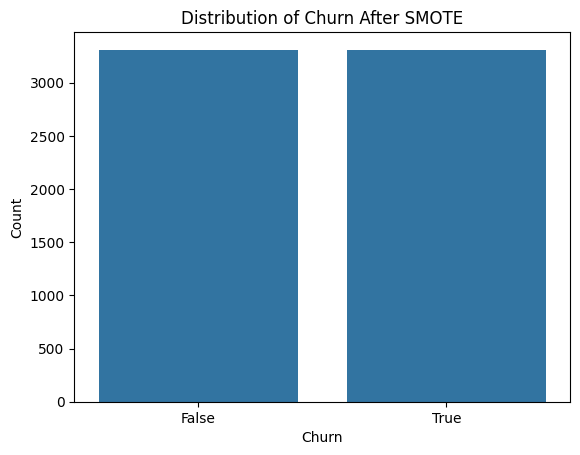

   SeniorCitizen    tenure  Charges_Month  TotalCharges  gender_Male  \
0      -0.437749 -0.875144       0.709143     -0.617532         True   
1      -0.437749 -0.424737       0.660949     -0.209107        False   
2      -0.437749 -1.120820      -0.513990     -0.909695        False   
3      -0.437749 -0.793252      -0.989284     -0.815255        False   
4      -0.437749  1.622566       1.648098      2.691198         True   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0        False            True              True   
1        False            True              True   
2         True            True              True   
3        False           False             False   
4         True           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  tenure_group_12-24  \
0                           False               True  ...               False   
1                           False               True  ...                True   
2          

In [27]:
# Split the data into training and testing sets
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the distribution of the target variable after SMOTE
sns.countplot(x=y_train_smote)
plt.title('Distribution of Churn After SMOTE')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.show()

# Display the first few rows of the training data after SMOTE
print(X_train_smote.head())
print(y_train_smote.head())

In [32]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Train and evaluate Logistic Regression
log_reg.fit(X_train_smote, y_train_smote)
log_reg_pred = log_reg.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

print("Logistic Regression - Accuracy: {:.2f}, F1-Score: {:.2f}".format(log_reg_acc, log_reg_f1))
print("Classification Report:\n", classification_report(y_test, log_reg_pred))

# Train and evaluate Random Forest
rf_clf.fit(X_train_smote, y_train_smote)
rf_pred = rf_clf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest - Accuracy: {:.2f}, F1-Score: {:.2f}".format(rf_acc, rf_f1))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Compare models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_reg_acc, rf_acc],
    'F1-Score': [log_reg_f1, rf_f1]
})

print(models)

Logistic Regression - Accuracy: 0.78, F1-Score: 0.64
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.80      0.84       828
        True       0.57      0.73      0.64       299

    accuracy                           0.78      1127
   macro avg       0.73      0.77      0.74      1127
weighted avg       0.81      0.78      0.79      1127

Random Forest - Accuracy: 0.76, F1-Score: 0.56
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.82      0.83       828
        True       0.55      0.59      0.56       299

    accuracy                           0.76      1127
   macro avg       0.70      0.70      0.70      1127
weighted avg       0.77      0.76      0.76      1127

                 Model  Accuracy  F1-Score
0  Logistic Regression  0.782609  0.640235
1        Random Forest  0.760426  0.564516


In [35]:
# Initialize models
log_reg = LogisticRegression(random_state=42)
rf_clf = RandomForestClassifier(random_state=42)

# Hyperparameter tuning using GridSearchCV
log_reg_params = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

rf_params = {
    'n_estimators': [100, 200, 500],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

log_reg_grid = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1')
rf_grid = GridSearchCV(rf_clf, rf_params, cv=5, scoring='f1')

# Train and evaluate Logistic Regression
log_reg_grid.fit(X_train_smote, y_train_smote)
log_reg_best = log_reg_grid.best_estimator_
log_reg_pred = log_reg_best.predict(X_test)
log_reg_acc = accuracy_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

print("Logistic Regression - Best Params:", log_reg_grid.best_params_)
print("Logistic Regression - Accuracy: {:.2f}, F1-Score: {:.2f}".format(log_reg_acc, log_reg_f1))
print("Classification Report:\n", classification_report(y_test, log_reg_pred))

# Train and evaluate Random Forest
rf_grid.fit(X_train_smote, y_train_smote)
rf_best = rf_grid.best_estimator_
rf_pred = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

print("Random Forest - Best Params:", rf_grid.best_params_)
print("Random Forest - Accuracy: {:.2f}, F1-Score: {:.2f}".format(rf_acc, rf_f1))
print("Classification Report:\n", classification_report(y_test, rf_pred))

# Compare models
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [log_reg_acc, rf_acc],
    'F1-Score': [log_reg_f1, rf_f1]
})

print(models)

Logistic Regression - Best Params: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Logistic Regression - Accuracy: 0.77, F1-Score: 0.63
Classification Report:
               precision    recall  f1-score   support

       False       0.89      0.79      0.84       828
        True       0.56      0.73      0.63       299

    accuracy                           0.77      1127
   macro avg       0.72      0.76      0.73      1127
weighted avg       0.80      0.77      0.78      1127

Random Forest - Best Params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}
Random Forest - Accuracy: 0.77, F1-Score: 0.58
Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.83      0.84       828
        True       0.56      0.60      0.58       299

    accuracy                           0.77      1127
   macro avg       0.71      0.72      0.71      1127
weighted avg       0.78      0.77      0.77      112